In [ ]:
# Logistic Regression
# - Supervised Model
# - Classfication
# 1. Yes/No (Binary) , 2. 0/1/2/3/4/5/6/7/... (Multi Class)
# Linear Model

In [ ]:
# Sigmoid - Takes any scale of value and returns value between (0 and 1)
# 1/(1 + exp(-z)) .

# Prediction = Sigmoid(Z) , 2

# Actual = Y = 0,1,0,1,1,
# Predictions = Signoid(Z), Z

# Loss = Binary Cross Entropy = - Sum of (Ylog(p) - (1-Y)log)1-P)
# Loss property -
#   1. If model predictions are good, then loss is less. If bad, loss is high

# Y = 1, P = 0.1
#  -(Ylog(p) - (1-Y)log(1-P)) => -(1*log(0.1)) => (1*-1) = 1

# Y = 1, P = 0.9
#  -(Ylog(p) - (1-Y)log(1-P)) => -(1*log(0.9)) => 0.105

# Y = 0, P = 0.1 (loss will be low)
# Y = 0, P = 0.9 (loss will be high)

# Gradient Descent (1984)
# Iterates over (n_iter):
#    W = W - learning_rate*dL/dW
#    b = b - learning_rate*dL/db

# KNN - K Nearest Neighbors
# Find all closest points to current point and assign the point based on their neighbors

# KNN - lazy learner
# K - Hyper parameter




In [ ]:
# Psuedo code

# Train
# save x , y

# Predict
# Loop over each data point
# Find Distance from that point to all other points
# Sort the distance (asending order), Find outputs for closest K point
# Do voting
# Highest vote wins


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('/content/sample_data/mnist_train_small.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.shape


(20000, 785)

In [ ]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

6


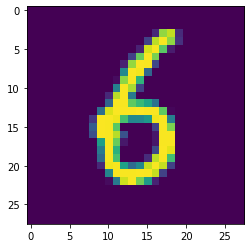

7


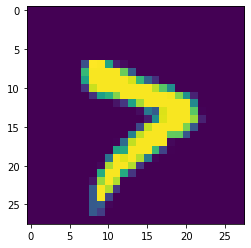

1


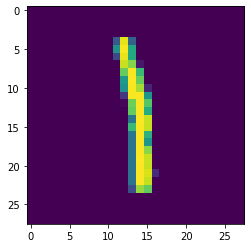

8


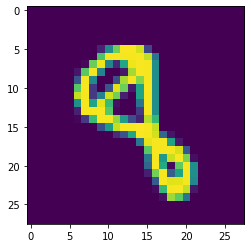

4


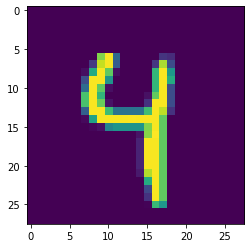

5


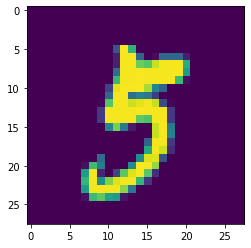

4


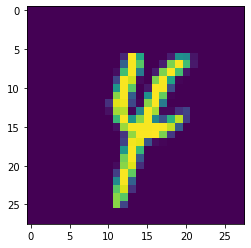

8


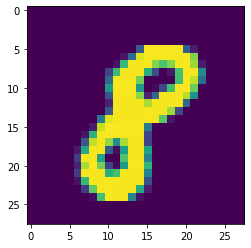

1


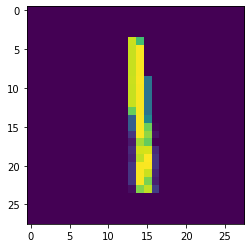

3


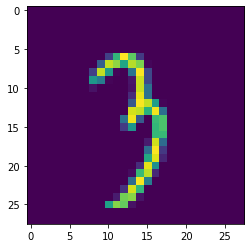

In [ ]:
for i in range(10):
    rand_idx = np.random.choice(X.shape[0])
    print(Y[rand_idx])
    plt.imshow(X[rand_idx].reshape(28, 28))
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

print (X.shape)

(20000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)
Xtrain.shape, Ytrain.shape

((16000, 784), (16000,))

In [ ]:
Xtest.shape, Ytest.shape

((4000, 784), (4000,))

In [ ]:
# !pip install scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print(" Initialized model ")
model = KNeighborsClassifier()

print(" Training Model ")
%time model.fit(Xtrain, Ytrain)




 Initialized model 
 Training Model 
CPU times: user 18.3 ms, sys: 776 µs, total: 19 ms
Wall time: 17.6 ms


KNeighborsClassifier()

In [ ]:
print(" Scoring Model ")
%time model.score(Xtest, Ytest)


 Scoring Model 
CPU times: user 7.28 s, sys: 745 ms, total: 8.02 s
Wall time: 4.85 s


0.92675

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)
%time model.fit(Xtrain, Ytrain)


CPU times: user 45.5 s, sys: 6.57 s, total: 52.1 s
Wall time: 30 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=200)

In [ ]:
predictions = model.predict(Xtest)
predictions

array([8, 0, 1, ..., 1, 0, 6])

In [ ]:
model.score(Xtest, Ytest)

0.893